# White Wine Modeling

In [32]:
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn import datasets

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
fileone="wineQualityReds.csv"
filetwo="wineQualityWhites.csv"

red_df=pd.read_csv(fileone)
white_df=pd.read_csv(filetwo)

In [4]:
np.shape(white_df)

(4898, 13)

In [5]:
white_df.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Dataframe for white wine

In [6]:
white_df.describe()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,2449.500000,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,1414.075139,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,1.000000,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,1225.250000,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,2449.500000,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,3673.750000,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,4898.000000,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


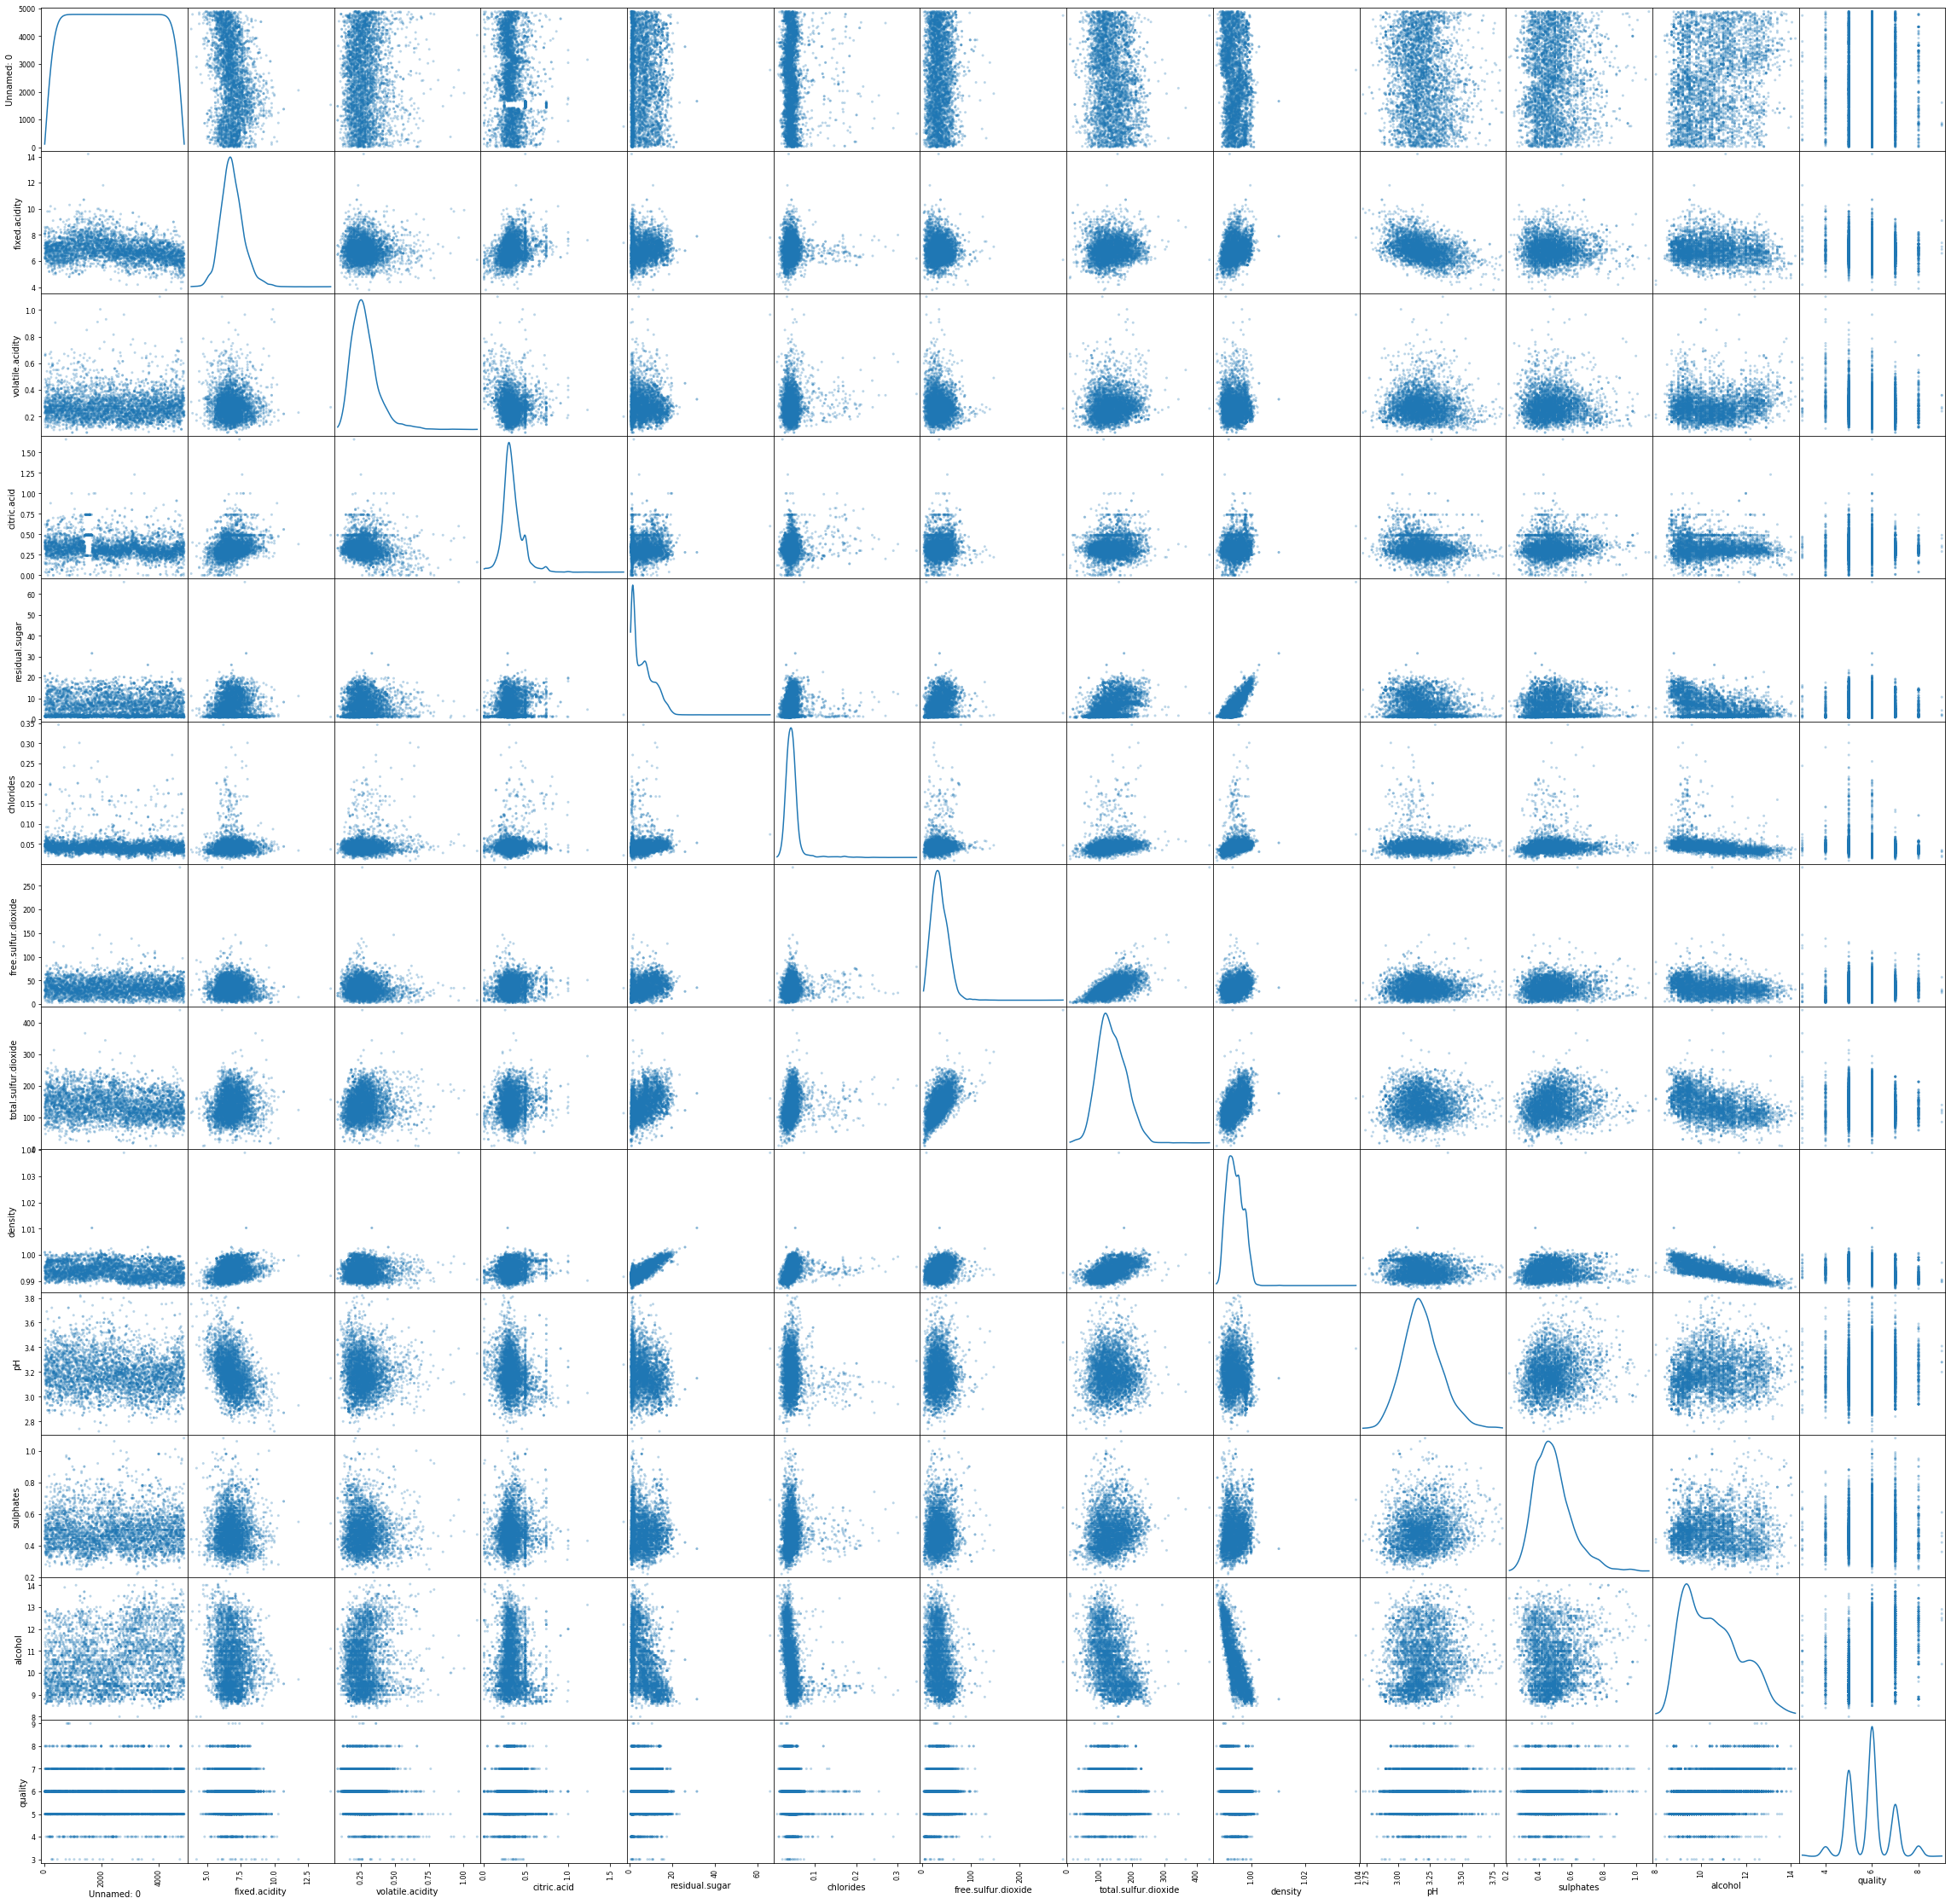

In [7]:
pd.plotting.scatter_matrix(white_df, alpha = 0.3, figsize = (40,40), diagonal = 'kde');

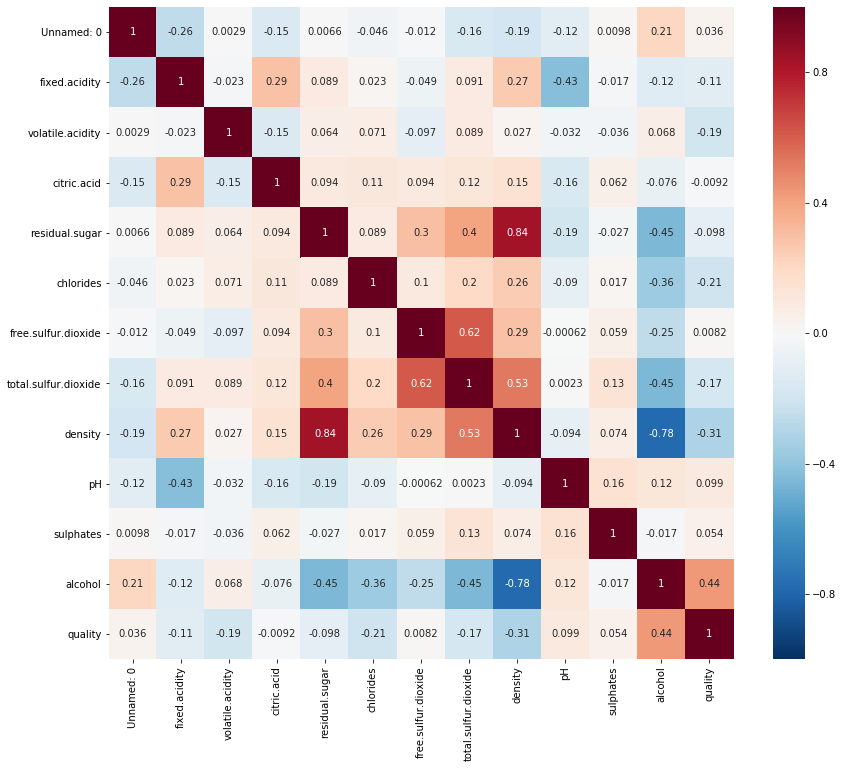

In [8]:
correlation = white_df.corr()
# display(correlation)
plt.figure(figsize=(14, 12))
]\O = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")0l
,

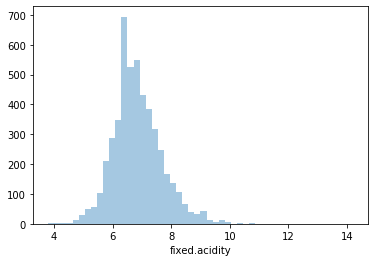

In [34]:
sns.distplot(white_df['fixed.acidity'],kde=0)

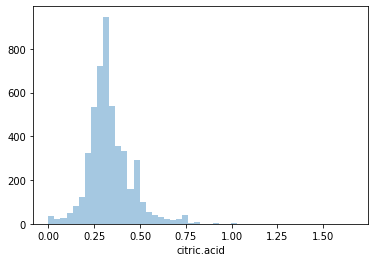

In [35]:
sns.distplot(white_df['citric.acid'],kde=0)

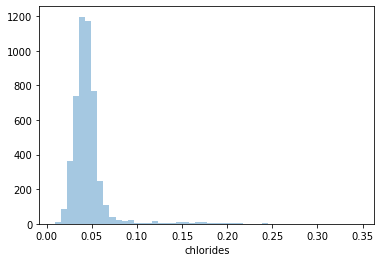

In [36]:
sns.distplot(white_df['chlorides'],kde=0)

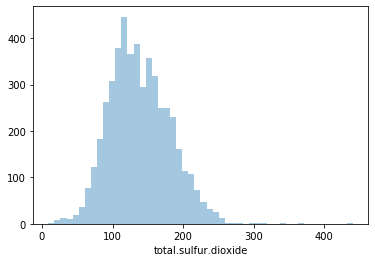

In [37]:
sns.distplot(white_df['total.sulfur.dioxide'],kde=0)

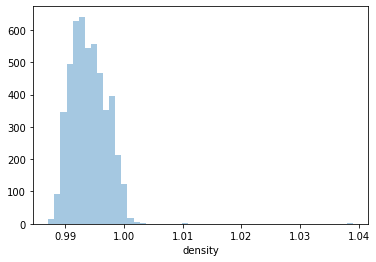

In [38]:
sns.distplot(white_df['density'],kde=0)

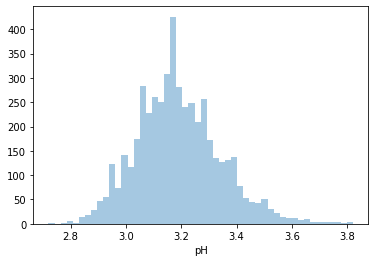

In [40]:
sns.distplot(white_df['pH'],kde=0)

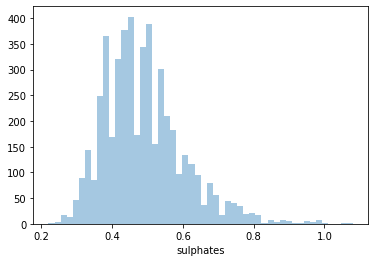

In [41]:
sns.distplot(white_df['sulphates'],kde=0)

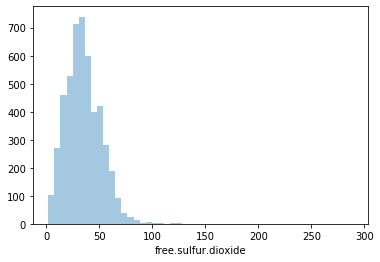

In [32]:
sns.distplot(white_df['free.sulfur.dioxide'],kde=0)

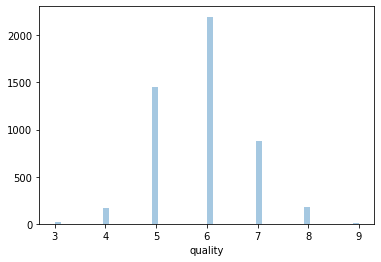

In [43]:
sns.distplot(white_df['quality'],kde=0)

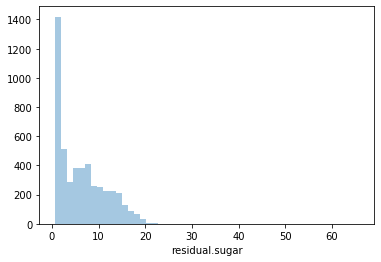

In [30]:
sns.distplot(white_df['residual.sugar'],kde=0)

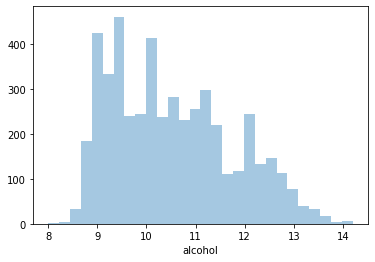

In [42]:
sns.distplot(white_df['alcohol'],kde=0)

In [40]:
array = white_df.values
X = array[:,0:11]
y = array[:,11]
print(X.shape, y.shape)

(4898, 11) (4898,)


In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [43]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, Y_train)
training_score = model.score(X_train, Y_train)
testing_score = model.score(X_test, Y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8608124544601512
Testing Score: 0.898996115009945


Text(0.5, 1.0, 'Residual Plot')

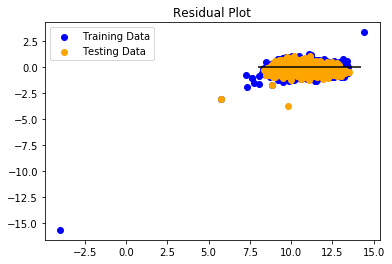

In [44]:
plt.scatter(model.predict(X_train), model.predict(X_train) - Y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - Y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [45]:
pd.DataFrame({"Prediction": predictions, "Actual": Y_test})

NameError: name 'predictions' is not defined